<a href="https://colab.research.google.com/github/Amrutha-Tsavatapalli/SIG-AI-HUB/blob/main/linearregression(scratch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"kesavamruthalakshmi","key":"6e6a9ef173acd20a4725d98dc1743990"}'}

In [ ]:

import os
os.listdir()


['.config', 'kaggle (2).json', 'sample_data']

In [ ]:
os.makedirs('/root/.kaggle', exist_ok=True)


In [ ]:
import shutil

# Move and rename the file
shutil.move('kaggle (2).json', '/root/.kaggle/kaggle.json')


'/root/.kaggle/kaggle.json'

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
import os
path = "/root/.cache/kagglehub/datasets/shree1992/housedata/versions/2"
print(os.listdir(path))


['data.csv', 'data.dat', 'output.csv']


In [ ]:
import pandas as pd
file_path = os.path.join(path, "data.csv")
data = pd.read_csv(file_path)
print(data.head())


                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (2).zip to archive (2).zip


In [ ]:
import zipfile
with zipfile.ZipFile('archive (2).zip', 'r') as zip_ref:
    zip_ref.extractall('house_prices')
import os
print(os.listdir('house_prices'))


['data.csv', 'data.dat', 'output.csv']


In [ ]:
import os
print("Files in current directory:", os.listdir())
print("Files in 'house_prices' folder:", os.listdir('house_prices'))


Files in current directory: ['.config', 'house_prices', 'archive (2).zip', 'sample_data']
Files in 'house_prices' folder: ['data.csv', 'data.dat', 'output.csv']


In [ ]:
import pandas as pd
data = pd.read_csv('house_prices/data.csv')
print(data.head())


                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [ ]:
# Filling missing values for numeric columns with the median
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())
# Filling missing values for categorical columns with the mode
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    mode_value = data[col].mode()[0]  # Getting the mode (most frequent value)
    data[col] = data[col].fillna(mode_value)
print(data.head())
print(data.tail())



                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [ ]:
# Checking for duplicates
duplicates = data.duplicated().sum()
data.drop_duplicates(inplace=True)
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [ ]:
# One-hot encode_-- categorical variables
data = pd.get_dummies(data, drop_first=True)
print(data.head())


       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0       3.0       1.50         1340      7912     1.5           0   
1  2384000.0       5.0       2.50         3650      9050     2.0           0   
2   342000.0       3.0       2.00         1930     11947     1.0           0   
3   420000.0       3.0       2.25         2000      8030     1.0           0   
4   550000.0       4.0       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  ...  statezip_WA 98155  statezip_WA 98166  \
0     0          3        1340  ...              False              False   
1     4          5        3370  ...              False              False   
2     0          4        1930  ...              False              False   
3     0          4        1000  ...              False              False   
4     0          4        1140  ...              False              False   

   statezip_WA 98168  statezip_WA 98177  statezip_WA 981

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
print(data_scaled)

[[-0.42386353 -0.44112227 -0.84320364 ... -0.1224925  -0.02554603
  -0.02085598]
 [ 3.2495981   1.75970468  0.43280154 ... -0.1224925  -0.02554603
  -0.02085598]
 [-0.37242442 -0.44112227 -0.20520105 ... -0.1224925  -0.02554603
  -0.02085598]
 ...
 [-0.23956224 -0.44112227  0.43280154 ... -0.1224925  -0.02554603
  -0.02085598]
 [-0.61826787  0.6592912  -0.20520105 ... -0.1224925  -0.02554603
  -0.02085598]
 [-0.58775916 -0.44112227  0.43280154 ... -0.1224925  -0.02554603
  -0.02085598]]


In [ ]:
#  Training dataset-Testing dataset Split
from sklearn.model_selection import train_test_split
X = data_scaled[:, :-1]
y = data_scaled[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0
        for _ in range(self.iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / self.m) * np.dot(X.T, (y_pred - y))
            db = (1 / self.m) * np.sum(y_pred - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
model = LinearRegressionScratch(learning_rate=0.01, iterations=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = np.mean(np.abs(y_pred - y_test))
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
r2_score = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

print(f"MAE: {mae}, RMSE: {rmse}, R^2: {r2_score}")

MAE: 0.014012086512359577, RMSE: 0.025724217204037204, R^2: -5.497482212696163e+31


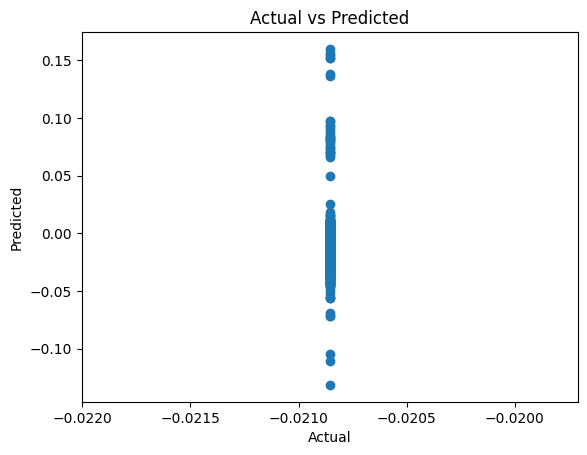

In [ ]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

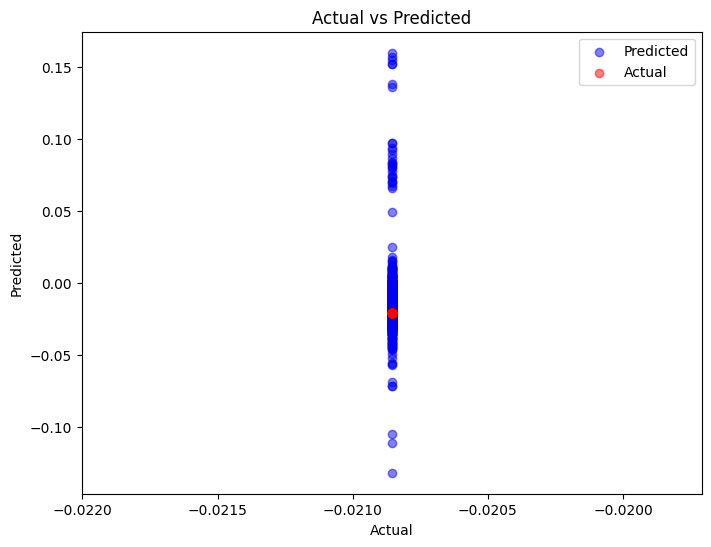

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#  Actual vs Predicted
plt.figure(figsize=(8, 6))
# Plot-- Actual values in blue
plt.scatter(y_test, y_pred, c='blue', label='Predicted', alpha=0.5)
# Plot-- Predicted values in red
plt.scatter(y_test, y_test, c='red', label='Actual', alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()
